<a href="https://colab.research.google.com/github/AARATHIPRADEEP/Deep-Learning-Projects/blob/main/CNN_BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense

In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumor/Training')

['pituitary', 'notumor', 'meningioma', 'glioma']

In [ ]:
os.listdir("/content/drive/MyDrive/Brain_Tumor/Testing")

['notumor', 'meningioma', 'pituitary', 'glioma']

In [ ]:
train_data='/content/drive/MyDrive/Brain_Tumor/Training'
X_train=[]
y_train=[]
Categories=['pituitary', 'notumor', 'meningioma', 'glioma']
for i in Categories:
  path=os.path.join(train_data,i)
  image=os.listdir(path)
  for img in image:
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))
    X_train.append(img_resize)
    y_train.append(Categories.index(i))
  print('loaded',i)

loaded pituitary
loaded notumor
loaded meningioma
loaded glioma


In [ ]:
test_data='/content/drive/MyDrive/Brain_Tumor/Testing'
X_test=[]
y_test=[]
Categories=['pituitary', 'notumor', 'meningioma', 'glioma']
for i in Categories:
  path=os.path.join(test_data,i)
  images=os.listdir(path)
  for img in images:
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))
    X_test.append(img_resize)
    y_test.append(Categories.index(i))
  print('loaded',i)


loaded pituitary
loaded notumor
loaded meningioma
loaded glioma


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(5529, 150, 150, 1)

In [ ]:
y_train.shape

(5529,)

In [ ]:
X_test.shape

(1311, 150, 150, 1)

In [ ]:
y_test.shape

(1311,)

In [ ]:
from keras.layers import Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='Softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=500,epochs=10)

Epoch 1/10
12/12 [==============================] - 119s 10s/step - loss: 2.2482 - accuracy: 0.3863
Epoch 2/10
12/12 [==============================] - 95s 8s/step - loss: 0.9628 - accuracy: 0.6184
Epoch 3/10
12/12 [==============================] - 97s 8s/step - loss: 0.6885 - accuracy: 0.7231
Epoch 4/10
12/12 [==============================] - 96s 8s/step - loss: 0.5346 - accuracy: 0.8095
Epoch 5/10
12/12 [==============================] - 91s 8s/step - loss: 0.4127 - accuracy: 0.8535
Epoch 6/10
12/12 [==============================] - 93s 8s/step - loss: 0.3451 - accuracy: 0.8819
Epoch 7/10
12/12 [==============================] - 93s 8s/step - loss: 0.2929 - accuracy: 0.9014
Epoch 8/10
12/12 [==============================] - 93s 8s/step - loss: 0.2413 - accuracy: 0.9251
Epoch 9/10
12/12 [==============================] - 106s 9s/step - loss: 0.2062 - accuracy: 0.9416
Epoch 10/10
12/12 [==============================] - 95s 8s/step - loss: 0.1888 - accuracy: 0.9398


In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print(loss)
print(accuracy)

41/41 [==============================] - 8s 194ms/step - loss: 0.2954 - accuracy: 0.9024
0.29536595940589905
0.9023646116256714


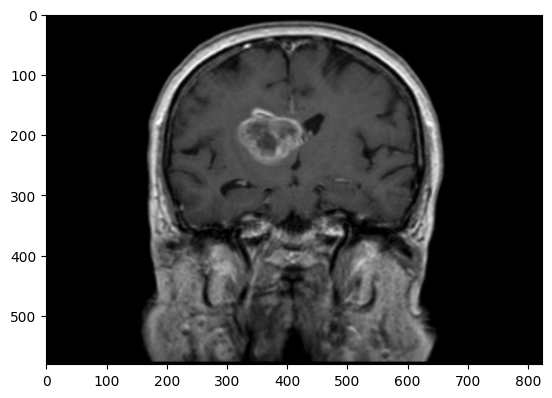

In [ ]:
img=imread('/content/drive/MyDrive/Dataset1/image-01-glioblastoma-multiforme-mrt-t1km-cor_hires.jpg')
plt.imshow(img)

In [ ]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

In [ ]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [ ]:
y_new=model.predict(img)
y_new

1/1 [==============================] - 0s 50ms/step


array([[0.00415129, 0.02427971, 0.9475893 , 0.02397967]], dtype=float32)

In [ ]:
ind=y_new.argmax()
ind
print(Categories[ind])

meningioma
